In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [2]:
def read_data():
    '''Import data from the data directory

    Inputs: None
    Returns: df. Pandas dataframe
    '''
    return pd.read_csv("../data/dev_data_nyc_airbnb.csv")

df = read_data()
print(df.shape)
# print(df.head(5))    

(46427, 16)


### Dummy continuous data

In [3]:
# Extract features and labels
y = df['price']
X = df[['minimum_nights','number_of_reviews','availability_365','reviews_per_month']]

# Fill missings with mean
my_imputer = SimpleImputer(strategy="mean")
X = my_imputer.fit_transform(X)

# Initialise the model (Random forest)
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X,y)

# Score the training data
y_p = rf_model.predict(X)

# Split into TTV
y_train = y[:20000] 
y_valid = y[20000:40000]
y_test = y[40000:]
y_train_p = y_p[:20000] 
y_valid_p = y_p[20000:40000]
y_test_p = y_p[40000:]

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)
print(y_train_p.shape)
print(y_valid_p.shape)
print(y_test_p.shape)

(20000,)
(20000,)
(6427,)
(20000,)
(20000,)
(6427,)


### Dummy binary classifier data
Just generate a number of 0s and 1s

In [85]:
# Get dummy binary classifier data
import random
y = [random.randint(0,1) for i in range(5000)]
y_p = [random.randint(0,1) for i in range(5000)]
y = np.array(y)
y_p = np.array(y_p)

# Split into TTV
y_train = y[:2000] 
y_valid = y[2000:4000]
y_test = y[4000:]
y_train_p = y_p[:2000] 
y_valid_p = y_p[2000:4000]
y_test_p = y_p[4000:]

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)
print(y_train_p.shape)
print(y_valid_p.shape)
print(y_test_p.shape)

(2000,)
(2000,)
(1000,)
(2000,)
(2000,)
(1000,)


### Dummy multi-level classifier data

In [90]:
# Get dummy binary classifier data
import random
levels = ['a','b','c','d','e']
y = [levels[random.randint(0,4)] for i in range(5000)]
y_p = [levels[random.randint(0,4)] for i in range(5000)]
y = np.array(y)
y_p = np.array(y_p)

print(y[:10])
print(y_p[:10])

# Split into TTV
y_train = y[:2000] 
y_valid = y[2000:4000]
y_test = y[4000:]
y_train_p = y_p[:2000] 
y_valid_p = y_p[2000:4000]
y_test_p = y_p[4000:]

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)
print(y_train_p.shape)
print(y_valid_p.shape)
print(y_test_p.shape)

['d' 'a' 'b' 'c' 'a' 'a' 'c' 'c' 'a' 'd']
['b' 'd' 'c' 'e' 'd' 'c' 'c' 'e' 'c' 'b']
(2000,)
(2000,)
(1000,)
(2000,)
(2000,)
(1000,)


# performance_metrics functions

In [92]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,
                            accuracy_score, precision_score, recall_score, f1_score,
                            confusion_matrix, classification_report

def performance_metrics(
        model_type = "reg", 
        y_train = None, y_train_p = None, 
        y_valid = None, y_valid_p = None,
        y_test = None, y_test_p = None
):
    '''Get the high level performance metrics for a model
    
    input:
        model_type: Str (default = "reg"). Type of model {reg, binary_class, "multi_class"}
        y_train: Pandas series or numpy array (default = None). Traing data labels
        y_train_p: Pandas series or numpy array (default = None). Training data predictions
        y_valid: Pandas series or numpy array (default = None). Validation data label
        y_valid_p: Pandas series or numpy array (default = None). Validation data predictions            
        y_test: Pandas series or numpy array (default = None). Validation data labels
        y_test_p: Pandas series or numpy array (default = None). Training data predictions
        
        In the case of a regressor the iterables represent probabilities
        In the case of a classifier (binary or multileve) the iterables represent class memberships 
        
    output:
        None
    '''
    print("Headline performance metrics")

    if model_type == "reg":        
        print("Model R2")
        if y_train is not None and y_train_p is not None: 
            print(f"\tTrain:\t\t{r2_score(y_train, y_train_p):.4f}")
        if y_valid is not None and y_valid_p is not None: 
            print(f"\tValidation:\t{r2_score(y_valid, y_valid_p):.4f}")
        if y_test is not None and y_test_p is not None: 
            print(f"\tTest:\t\t{r2_score(y_test, y_test_p):.4f}")
            
        print("MAE")
        if y_train is not None and y_train_p is not None: 
            print(f"\tTrain:\t\t{mean_absolute_error(y_train, y_train_p):.4f}")
        if y_valid is not None and y_valid_p is not None: 
            print(f"\tValidation:\t{mean_absolute_error(y_valid, y_valid_p):.4f}")
        if y_test is not None and y_test_p is not None: 
            print(f"\tTest:\t\t{mean_absolute_error(y_test, y_test_p):.4f}")
            
        print("MSE")
        if y_train is not None and y_train_p is not None: 
            print(f"\tTrain:\t\t{mean_squared_error(y_train, y_train_p):.4f}")
        if y_valid is not None and y_valid_p is not None: 
            print(f"\tValidation:\t{mean_squared_error(y_valid, y_valid_p):.4f}")
        if y_test is not None and y_test_p is not None: 
            print(f"\tTest:\t\t{mean_squared_error(y_test, y_test_p):.4f}")
        
        print("RMSE")
        if y_train is not None and y_train_p is not None: 
            print(f"\tTrain:\t\t{np.sqrt(mean_squared_error(y_train, y_train_p)):.4f}")
        if y_valid is not None and y_valid_p is not None: 
            print(f"\tValidation:\t{np.sqrt(mean_squared_error(y_valid, y_valid_p)):.4f}")
        if y_test is not None and y_test_p is not None: 
            print(f"\tTest:\t\t{np.sqrt(mean_squared_error(y_test, y_test_p)):.4f}")
            
    
    if model_type == "binary_class":
        print("Accuracy")
        if y_train is not None and y_train_p is not None: 
            print(f"\tTrain:\t\t{accuracy_score(y_train, y_train_p):.4f}")
        if y_valid is not None and y_valid_p is not None: 
            print(f"\tValidation:\t{accuracy_score(y_valid, y_valid_p):.4f}")
        if y_test is not None and y_test_p is not None: 
            print(f"\tTest:\t\t{accuracy_score(y_test, y_test_p):.4f}")

        print("Precision")
        if y_train is not None and y_train_p is not None: 
            print(f"\tTrain:\t\t{precision_score(y_train, y_train_p):.4f}")
        if y_valid is not None and y_valid_p is not None: 
            print(f"\tValidation:\t{precision_score(y_valid, y_valid_p):.4f}")
        if y_test is not None and y_test_p is not None: 
            print(f"\tTest:\t\t{precision_score(y_test, y_test_p):.4f}")
            
        print("Recall")
        if y_train is not None and y_train_p is not None: 
            print(f"\tTrain:\t\t{recall_score(y_train, y_train_p):.4f}")
        if y_valid is not None and y_valid_p is not None: 
            print(f"\tValidation:\t{recall_score(y_valid, y_valid_p):.4f}")
        if y_test is not None and y_test_p is not None: 
            print(f"\tTest:\t\t{recall_score(y_test, y_test_p):.4f}")

        print("F1 score")
        if y_train is not None and y_train_p is not None: 
            print(f"\tTrain:\t\t{f1_score(y_train, y_train_p):.4f}")
        if y_valid is not None and y_valid_p is not None: 
            print(f"\tValidation:\t{f1_score(y_valid, y_valid_p):.4f}")
        if y_test is not None and y_test_p is not None: 
            print(f"\tTest:\t\t{f1_score(y_test, y_test_p):.4f}")

        print("\n\nClassification report")
        if y_train is not None and y_train_p is not None: 
            print("\nTrain")
            print(classification_report(y_train, y_train_p, digits = 4))
        if y_valid is not None and y_valid_p is not None: 
            print("\nValid")
            print(classification_report(y_valid, y_valid_p, digits = 4))
        if y_test is not None and y_test_p is not None: 
            print("\nTest")            
            print(classification_report(y_test, y_test_p, digits = 4))

                        
    if model_type == "multi_class":
        print("Accuracy")
        if y_train is not None and y_train_p is not None: 
            print(f"\tTrain:\t\t{accuracy_score(y_train, y_train_p):.4f}")
        if y_valid is not None and y_valid_p is not None: 
            print(f"\tValidation:\t{accuracy_score(y_valid, y_valid_p):.4f}")
        if y_test is not None and y_test_p is not None: 
            print(f"\tTest:\t\t{accuracy_score(y_test, y_test_p):.4f}")
                       
        print("\n\nClassification report")
        if y_train is not None and y_train_p is not None: 
            print("\nTrain")
            print(classification_report(y_train, y_train_p, digits = 4))
        if y_valid is not None and y_valid_p is not None: 
            print("\nValid")
            print(classification_report(y_valid, y_valid_p, digits = 4))
        if y_test is not None and y_test_p is not None: 
            print("\nTest")            
            print(classification_report(y_test, y_test_p, digits = 4))


In [79]:
perf_mets(
    y_train = y_train, y_train_p = y_train_p,
    y_valid = y_valid, y_valid_p = y_valid_p,
    y_test = y_test, y_test_p = y_test_p
)

Headline performance metrics
Model R2
	Train:		-0.9643
	Validation:	-0.9852
	Test:		-0.9613
MAE
	Train:		0.4910
	Validation:	0.4960
	Test:		0.4900
MSE
	Train:		0.4910
	Validation:	0.4960
	Test:		0.4900
RMSE
	Train:		0.7007
	Validation:	0.7043
	Test:		0.7000


In [86]:
perf_mets(
    model_type = "binary_class",    
    y_train = y_train, y_train_p = y_train_p,
    y_valid = y_valid, y_valid_p = y_valid_p,
    y_test = y_test, y_test_p = y_test_p
)

Headline performance metrics
Accuracy
	Train:		0.5185
	Validation:	0.5020
	Test:		0.4630
Precision
	Train:		0.5251
	Validation:	0.4975
	Test:		0.4565
Recall
	Train:		0.5350
	Validation:	0.4975
	Test:		0.4797
F1 score
	Train:		0.5300
	Validation:	0.4975
	Test:		0.4678


Classification report

Train
              precision    recall  f1-score   support

           0     0.5114    0.5015    0.5064       985
           1     0.5251    0.5350    0.5300      1015

    accuracy                         0.5185      2000
   macro avg     0.5183    0.5182    0.5182      2000
weighted avg     0.5184    0.5185    0.5184      2000


Valid
              precision    recall  f1-score   support

           0     0.5064    0.5064    0.5064      1009
           1     0.4975    0.4975    0.4975       991

    accuracy                         0.5020      2000
   macro avg     0.5020    0.5020    0.5020      2000
weighted avg     0.5020    0.5020    0.5020      2000


Test
              precision    recall 

In [89]:
perf_mets(
    model_type = "binary_class",
    y_train = y, y_train_p = y_pred, 
    y_test = y, y_test_p = y_pred,
    y_valid = y, y_valid_p = y_pred
)

Headline performance metrics
Accuracy
	Train:		0.4844
	Validation:	0.4844
	Test:		0.4844
Precision
	Train:		0.4839
	Validation:	0.4839
	Test:		0.4839
Recall
	Train:		0.4804
	Validation:	0.4804
	Test:		0.4804
F1 score
	Train:		0.4821
	Validation:	0.4821
	Test:		0.4821


Classification report

Train
              precision    recall  f1-score   support

           0     0.4849    0.4884    0.4867      2502
           1     0.4839    0.4804    0.4821      2498

    accuracy                         0.4844      5000
   macro avg     0.4844    0.4844    0.4844      5000
weighted avg     0.4844    0.4844    0.4844      5000


Valid
              precision    recall  f1-score   support

           0     0.4849    0.4884    0.4867      2502
           1     0.4839    0.4804    0.4821      2498

    accuracy                         0.4844      5000
   macro avg     0.4844    0.4844    0.4844      5000
weighted avg     0.4844    0.4844    0.4844      5000


Test
              precision    recall 

In [93]:
perf_mets(
    model_type = "multi_class",    
    y_train = y_train, y_train_p = y_train_p,
    y_valid = y_valid, y_valid_p = y_valid_p,
    y_test = y_test, y_test_p = y_test_p
)

Headline performance metrics
Accuracy
	Train:		0.2010
	Validation:	0.1955
	Test:		0.2080


Classification report

Train
              precision    recall  f1-score   support

           a     0.2030    0.2097    0.2063       391
           b     0.2124    0.1980    0.2049       399
           c     0.2069    0.2244    0.2153       401
           d     0.1726    0.1655    0.1689       411
           e     0.2101    0.2085    0.2093       398

    accuracy                         0.2010      2000
   macro avg     0.2010    0.2012    0.2010      2000
weighted avg     0.2008    0.2010    0.2008      2000


Valid
              precision    recall  f1-score   support

           a     0.1946    0.2047    0.1995       386
           b     0.2038    0.2078    0.2058       409
           c     0.1774    0.1734    0.1753       398
           d     0.1935    0.1797    0.1864       395
           e     0.2067    0.2112    0.2089       412

    accuracy                         0.1955      2000
   m

# reg_scatter_plot

In [36]:
import plotly.express as px  
import plotly.io as pio
import plotly.graph_objects as go

def reg_scatter_plot(
        y_train = None, y_train_p = None, 
        y_valid = None, y_valid_p = None,
        y_test = None, y_test_p = None):
    
    '''Get a simple scatter plot of actual v predicted
    
    input:
        y_train: Pandas series or numpy array (default = None). Traing data labels
        y_train_p: Pandas series or numpy array (default = None). Training data predictions
        y_valid: Pandas series or numpy array (default = None). Validation data label
        y_valid_p: Pandas series or numpy array (default = None). Validation data predictions            
        y_test: Pandas series or numpy array (default = None). Validation data labels
        y_test_p: Pandas series or numpy array (default = None). Training data predictions

    output:
        None
        
    TODO: Check the datasets, sample down if required
    TODO: Return the fig object
    '''

    fig = go.Figure()
 
    # Train 
    if y_train is not None and y_train_p is not None:    
        fig.add_trace(go.Scatter(x = y_train, 
                                 y = y_train_p, 
                                 name = 'Train',
                                 mode='markers',
                                 marker_size = 4,
                                 marker_color = 'Red'))
 
    # Valid  
    if y_valid is not None and y_valid_p is not None: 
        fig.add_trace(go.Scatter(x = y_valid, 
                                 y = y_valid_p, 
                                 name = 'Valid',
                                 mode='markers',
                                 marker_size = 4,
                                 marker_color = 'Green'))

    # Test
    if y_test is not None and y_test_p is not None: 
        fig.add_trace(go.Scatter(x = y_test, 
                                 y = y_test_p, 
                                 name = 'Test',                         
                                 mode='markers',
                                 marker_size = 4,
                                 marker_color = 'Blue'))
 
    # Tidy up chart 
    fig.update_xaxes(title ='Actual')
    fig.update_yaxes(title ='Predicted')    
    #fig.update_xaxes(range=[0, 1])
    #fig.update_yaxes(range=[0, 1])
    fig.update_layout(template = "none", # "seaborn" or "simple_white"
                      autosize = False,
                      width=800,
                      height=800)
    
    fig.show()

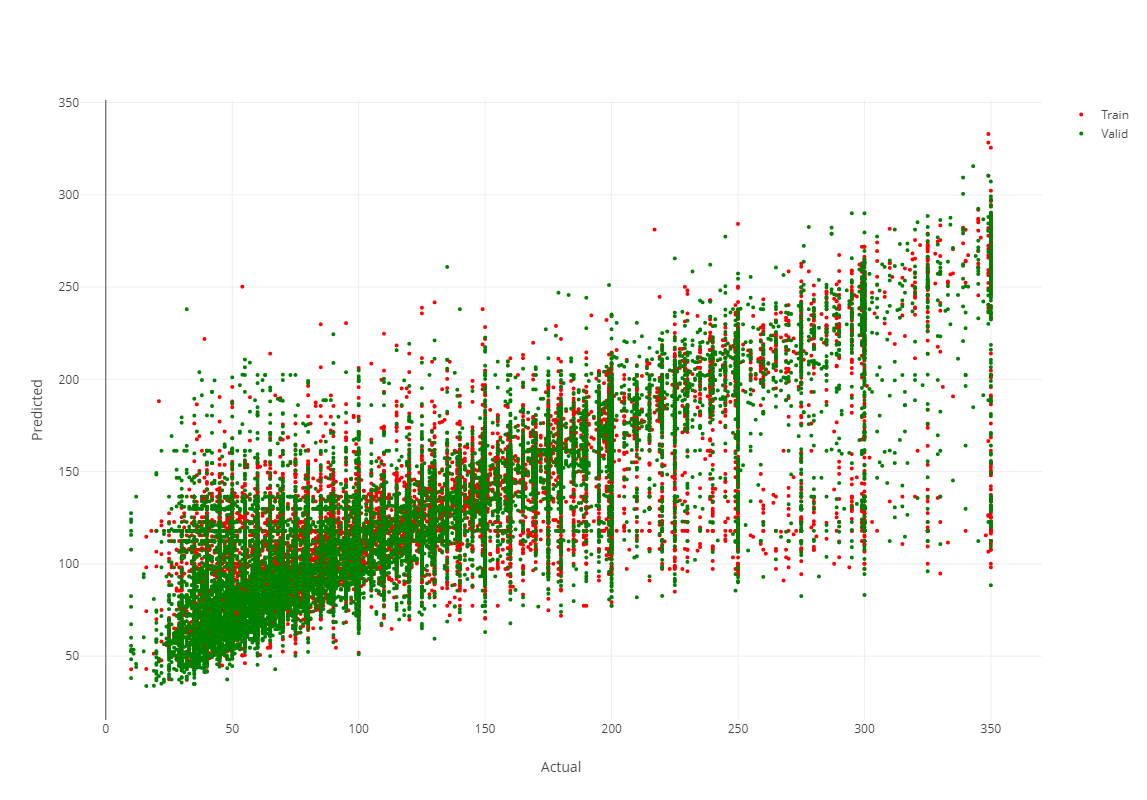

<class 'NoneType'>


In [35]:
tmp = reg_scatter_plot(
    y_train = y_train, y_train_p = y_train_p,
    y_valid = y_valid, y_valid_p = y_valid_p,
    y_test = y_test, y_test_p = y_test_p
)
print(type(tmp))

None
